# **Sun-as-a-star analysis of coronal high-frequency quasi-periodic oscillations observed by an iPhone during the total solar eclipse of 20 April 2023 with 240 fps imaging**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  

<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook 1.1**
#### File name sort. 
- input: *.jpg
- output: *.jpg

STEP 1: file name sort. 
- To prevent file sorting errors, we standardized the file naming format by padding, for instance, renaming $\texttt{image1.jpg}$ to $\texttt{image00001.jpg}$. This approach ensures proper file sequencing during subsequent batch data processing.


In [1]:
import pandas as pd
import os
import numpy as np
from astropy.io import fits
import skimage.io as io 

## Mathmatics libraries
import numpy as np
import math

## Image Processing libraries
import skimage
from skimage import exposure
import scipy.misc as misc
import rawpy
import imageio
## Visual and plotting libraries
import matplotlib.pyplot as plt
from PIL import Image

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
path0 = '/Volumes/WD1T/share/TSE2023/'                                      # Parent folder
pathmc = '/Volumes/WD1T/share/TSE2023/iPhone/cut/'                          # input dir of the cut moive of the original data, to aviod the 

dir1  = path0 + 'iPhone/result/m2pic/'                                      # output dir for saving the frames extracted by the moive
if not os.path.exists(dir1):
    os.makedirs(dir1)

In [3]:
pathd = dir1
os. chdir(pathd) 
listd = os.listdir(pathd)
listd.sort()
print(listd[0])
print(len(listd))

image_0.jpg
23283


/Volumes/WD1T/share/TSE2023/iPhone/result/m2pic/image_12157.jpg


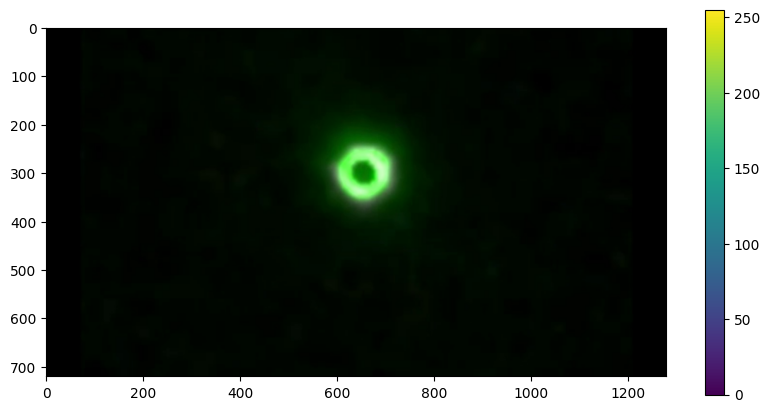

In [4]:
st1 = len(listd) - 240* 54 - 323  + 240 *10     # The 10th seconds of the total solar eclipse
from PIL import Image
print(pathd + listd[st1])
## Reading a RAW file:
img0 = Image.open(pathd + listd[st1])
plt.figure(figsize=(10,5))
plt.imshow(img0)
plt.colorbar()
plt.show()

In [5]:
print("img_PIL:",img0)
img0np = np.array(img0)
m,n,o = img0np.shape
img0g = np.zeros([m,n],dtype='uint16')
#img0g = img0np[:,:,0] + img0np[:,:,1] +img0np[:,:,2]

img0np.dtype, img0np.shape,img0g.dtype, img0g.shape

img_PIL: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FA7415E3940>


(dtype('uint8'), (720, 1280, 3), dtype('uint16'), (720, 1280))

In [6]:
print("img_PIL:",img0)
img0np = np.array(img0)
m,n,o = img0np.shape
img0g = ((img0np[:,:,0]/ 3 + img0np[:,:,1]/ 3+ img0np[:,:,2]/ 3) )#.astype(np.uint8)
#img0g = img0np[:,:,0] +img0np[:,:,1]+img0np[:,:,2]
img0g.dtype

img_PIL: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7FA7415E3940>


dtype('float64')

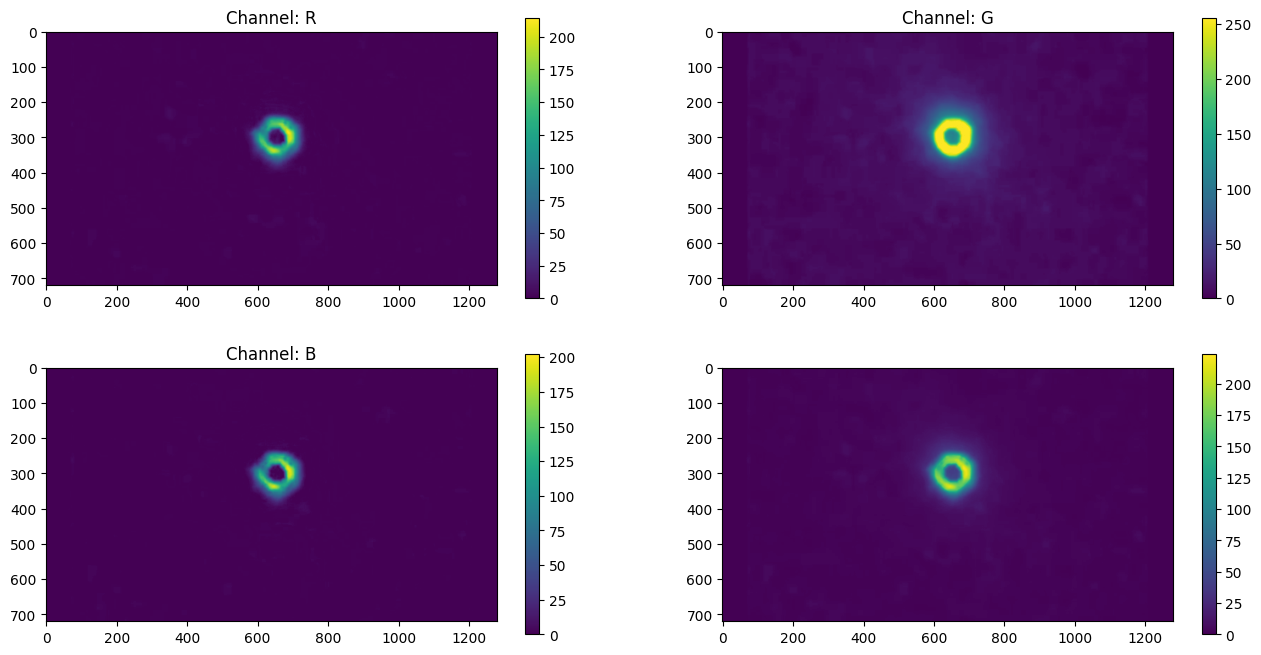

1.941101345486111 10.565529513888889 1.5913552517361111


<Figure size 640x480 with 0 Axes>

In [7]:
# print("img_PIL:",img0)
# img0np = np.array(img0)



plt.figure(figsize=(16,8))
plt.subplot(221)
plt.imshow(img0np[:,:,0])
plt.title('Channel: R')
plt.colorbar()
plt.subplot(222)
plt.imshow(img0np[:,:,1])
plt.title('Channel: G')
plt.colorbar()
plt.subplot(223) 
plt.imshow(img0np[:,:,2])
plt.title('Channel: B')
plt.colorbar()
plt.subplot(224)
plt.imshow(img0g)
plt.title(' ')
plt.colorbar()
plt.show()
plt.tight_layout()
print(np.mean(img0np[:,:,0]),np.mean(img0np[:,:,1]),np.mean(img0np[:,:,2]))

/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_43631/611558596.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


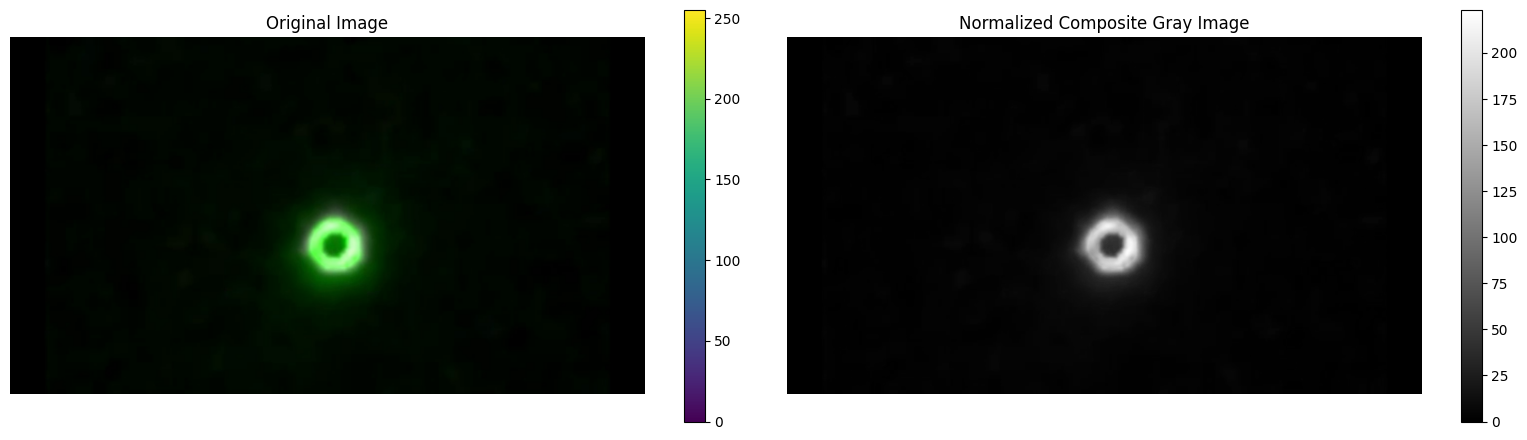

In [8]:
plt.figure(figsize=(16,4.5))
plt.title('The central area around the corona')
plt.subplot(121)
plt.imshow(img0,origin= 'lower')
plt.title('Original Image')
plt.colorbar()
plt.axis('off')
plt.subplot(122)
plt.imshow(img0g, cmap = 'gray',origin= 'lower')
plt.title('Normalized Composite Gray Image')
plt.colorbar()
plt.axis('off')
plt.tight_layout()

pathfigs = '/Users/liangyu/Library/CloudStorage/OneDrive-USTC/codes/gitcode/gitee/tse2023wv/munuscript/Supplementary informations/Supplementary information/'
plt.savefig(pathfigs + 'RGB-gray.png', bbox_inches='tight')
plt.show()

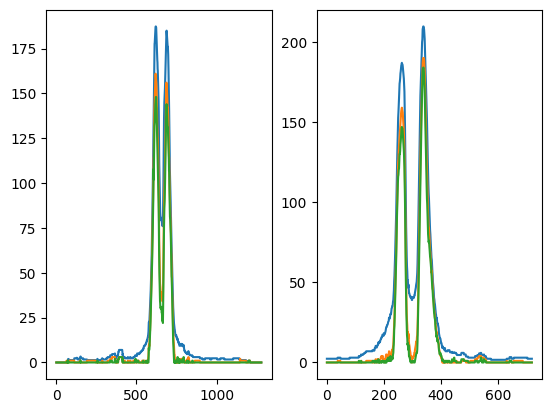

In [9]:
ln = 320
cn = 650
plt.subplot(121)
plt.plot(img0g[ln,:])
plt.plot(img0np[ln,:,0])
plt.plot(img0np[ln,:,2])
plt.subplot(122)
plt.plot(img0g[:,cn])
plt.plot(img0np[:,cn,0])
plt.plot(img0np[:,cn,2])
# 从st1 = 3开始，  r,b chanel 不饱和了, 直到视频结束。

In [10]:
def filenamesort3(pathd):
    os. chdir(pathd) 
    listd = os.listdir(pathd)
    listd.sort()
    file_bmps = [i for i in listd if i.split(".")[-1] == "jpg"]
    fnnh = len(file_bmps)   #fnn: file name number
    print('fine numbers: ',fnnh)
    #fnnh = int(fnn/2)      #fnnh: file name number half
    file_bmpsn = file_bmps#[fnnh::]
    for i in file_bmpsn:
        print(i)
        new_name =  i.split("age_")[0] + "age_" + i.split("age_")[1].zfill(9)
        print(new_name)
        os.rename(i,new_name)
    return fnnh

In [11]:
pathd = path0 + 'iPhone/result/m2pic/' 
fnnh = filenamesort3(pathd)

fine numbers:  23283
image_0.jpg
image_00000.jpg
image_00000.jpg
image_00000.jpg
image_00001.jpg
image_00001.jpg
image_00002.jpg
image_00002.jpg
image_00003.jpg
image_00003.jpg
image_00004.jpg
image_00004.jpg
image_00005.jpg
image_00005.jpg
image_00006.jpg
image_00006.jpg
image_00007.jpg
image_00007.jpg
image_00008.jpg
image_00008.jpg
image_00009.jpg
image_00009.jpg
image_00010.jpg
image_00010.jpg
image_00011.jpg
image_00011.jpg
image_00012.jpg
image_00012.jpg
image_00013.jpg
image_00013.jpg
image_00014.jpg
image_00014.jpg
image_00015.jpg
image_00015.jpg
image_00016.jpg
image_00016.jpg
image_00017.jpg
image_00017.jpg
image_00018.jpg
image_00018.jpg
image_00019.jpg
image_00019.jpg
image_00020.jpg
image_00020.jpg
image_00021.jpg
image_00021.jpg
image_00022.jpg
image_00022.jpg
image_00023.jpg
image_00023.jpg
image_00024.jpg
image_00024.jpg
image_00025.jpg
image_00025.jpg
image_00026.jpg
image_00026.jpg
image_00027.jpg
image_00027.jpg
image_00028.jpg
image_00028.jpg
image_00029.jpg
image_0

In [12]:
listd = os.listdir(pathd)
listd.sort()
print(listd[0:10])
print(len(listd))

['image_00000.jpg', 'image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg']
13283


In [13]:
print('file name sort done!')

file name sort done!
